<a href="https://colab.research.google.com/github/ChinarVyas/Evaluation-Projects/blob/main/Evaluation-Projects/Phase%3AIII/Rainfall_Weather_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Rainfall Weather Forecasting
Project Description
Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.
Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:

1. Problem Statement:
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.
b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


Dataset Description:
Number of columns: 23


Date  - The date of observation
Location  -The common name of the location of the weather station
MinTemp  -The minimum temperature in degrees celsius
MaxTemp -The maximum temperature in degrees celsius
Rainfall  -The amount of rainfall recorded for the day in mm
Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am
Sunshine  -The number of hours of bright sunshine in the day.
WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight
WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight
WindDir9am -Direction of the wind at 9am
WindDir3pm -Direction of the wind at 3pm
WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am
WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm
Humidity9am -Humidity (percent) at 9am
Humidity3pm -Humidity (percent) at 3pm
Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am
Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm
Cloud9am - Fraction of sky obscured by cloud at 9am.
Cloud3pm -Fraction of sky obscured by cloud
Temp9am-Temperature (degrees C) at 9am
Temp3pm -Temperature (degrees C) at 3pm
RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".

Dataset Link-  
•	https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv
•	https://github.com/dsrscientist/dataset3


In [1]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
ausw=pd.read_csv(r'/content/drive/MyDrive/Data Analysis/Data/weatheraus.csv',index_col="Date")

In [3]:
ausw

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No




1.   **upon loading we see there are 8425 rows 23 columns with multiple null values and this data has 16 numerical and 7 categorical values**
2.  **for the ease of coding lowering the cases for column names**



In [4]:
ausw.columns=ausw.columns.str.lower()
ausw

,location,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,windgustspeed,winddir9am,winddir3pm,...,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,raintomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No


In [5]:
numerical_feature = [feature for feature in ausw.columns if ausw[feature].dtypes != 'O']
categorical_feature = [feature for feature in ausw.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))

Numerical Features Count 16
Categorical feature Count 6


In [6]:
ausw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8425 entries, 2008-12-01 to 2017-06-25
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   location       8425 non-null   object 
 1   mintemp        8350 non-null   float64
 2   maxtemp        8365 non-null   float64
 3   rainfall       8185 non-null   float64
 4   evaporation    4913 non-null   float64
 5   sunshine       4431 non-null   float64
 6   windgustdir    7434 non-null   object 
 7   windgustspeed  7434 non-null   float64
 8   winddir9am     7596 non-null   object 
 9   winddir3pm     8117 non-null   object 
 10  windspeed9am   8349 non-null   float64
 11  windspeed3pm   8318 non-null   float64
 12  humidity9am    8366 non-null   float64
 13  humidity3pm    8323 non-null   float64
 14  pressure9am    7116 non-null   float64
 15  pressure3pm    7113 non-null   float64
 16  cloud9am       6004 non-null   float64
 17  cloud3pm       5970 non-null   float64
 18

In [7]:
ausw.describe().T

,count,mean,std,min,25%,50%,75%,max
mintemp,8350.0,13.193305,5.403596,-2.0,9.20,13.3,17.4,28.5
maxtemp,8365.0,23.859976,6.136408,8.2,19.30,23.3,28.0,45.5
rainfall,8185.0,2.805913,10.459379,0.0,0.00,0.0,1.0,371.0
evaporation,4913.0,5.389395,5.044484,0.0,2.60,4.6,7.0,145.0
sunshine,4431.0,7.632205,3.896235,0.0,4.75,8.7,10.7,13.9
windgustspeed,7434.0,40.174469,14.665721,7.0,30.00,39.0,50.0,107.0
windspeed9am,8349.0,13.847646,10.174579,0.0,6.00,13.0,20.0,63.0
windspeed3pm,8318.0,18.533662,9.766986,0.0,11.00,19.0,24.0,83.0
humidity9am,8366.0,67.822496,16.833283,10.0,56.00,68.0,80.0,100.0
humidity3pm,8323.0,51.249790,18.423774,6.0,39.00,51.0,63.0,99.0


we referred to info to confirm the null values and also checked the spread and the outliers in the data which we will work before processing the further details

we are removing whitespaces using strip

In [8]:
for i in categorical_feature:
    ausw[i] = ausw[i].str.strip()

In [9]:
ausw.isnull().sum()

location            0
mintemp            75
maxtemp            60
rainfall          240
evaporation      3512
sunshine         3994
windgustdir       991
windgustspeed     991
winddir9am        829
winddir3pm        308
windspeed9am       76
windspeed3pm      107
humidity9am        59
humidity3pm       102
pressure9am      1309
pressure3pm      1312
cloud9am         2421
cloud3pm         2455
temp9am            56
temp3pm            96
raintoday         240
raintomorrow      238
dtype: int64

In [10]:
ausw.isnull().sum()*100/len(ausw)

location          0.000000
mintemp           0.890208
maxtemp           0.712166
rainfall          2.848665
evaporation      41.685460
sunshine         47.406528
windgustdir      11.762611
windgustspeed    11.762611
winddir9am        9.839763
winddir3pm        3.655786
windspeed9am      0.902077
windspeed3pm      1.270030
humidity9am       0.700297
humidity3pm       1.210682
pressure9am      15.537092
pressure3pm      15.572700
cloud9am         28.735905
cloud3pm         29.139466
temp9am           0.664688
temp3pm           1.139466
raintoday         2.848665
raintomorrow      2.824926
dtype: float64



1.   check the percentage and the actual numbers of null value in the data
2.   also we see there is a huge imblance in the dependent column which will need to be balanced using SMOTE. also we see an NA till in the output which will need to be treated seperately if it does not align with nan removal technique



In [11]:
 ausw["raintomorrow"].value_counts()

No     6195
Yes    1991
NA        1
Name: raintomorrow, dtype: int64

In [12]:
numerical_feature

['mintemp',
 'maxtemp',
 'rainfall',
 'evaporation',
 'sunshine',
 'windgustspeed',
 'windspeed9am',
 'windspeed3pm',
 'humidity9am',
 'humidity3pm',
 'pressure9am',
 'pressure3pm',
 'cloud9am',
 'cloud3pm',
 'temp9am',
 'temp3pm']

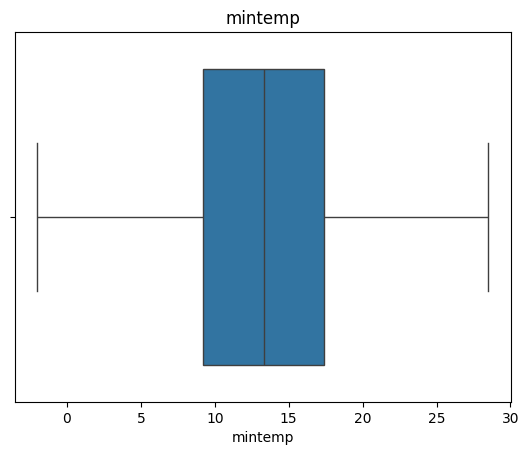

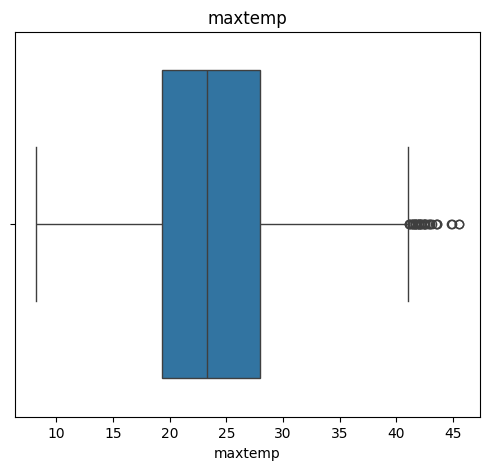

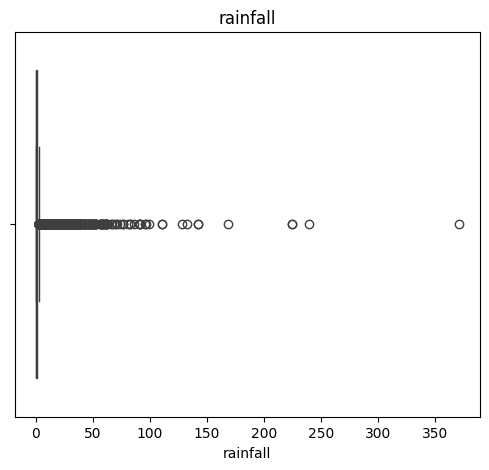

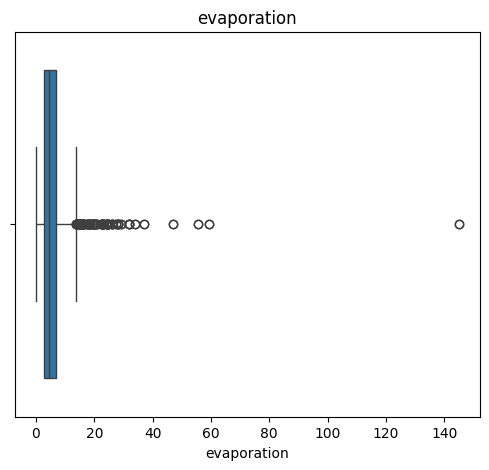

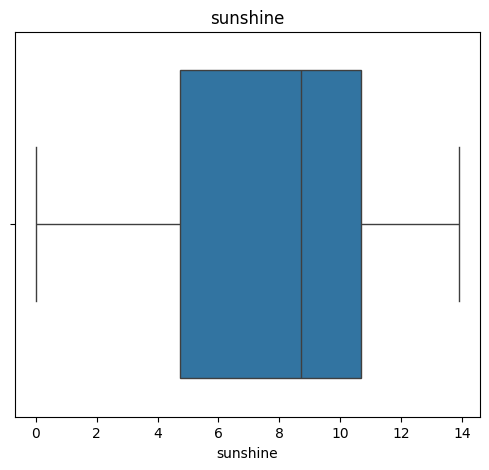

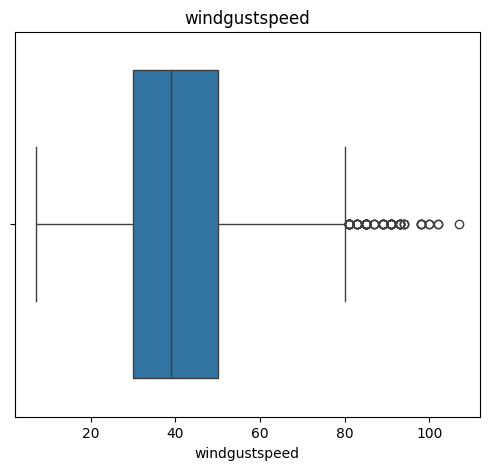

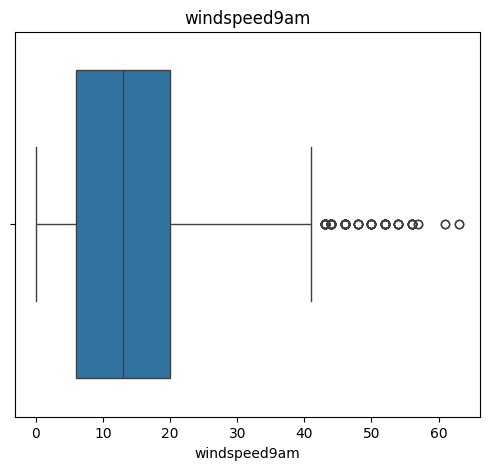

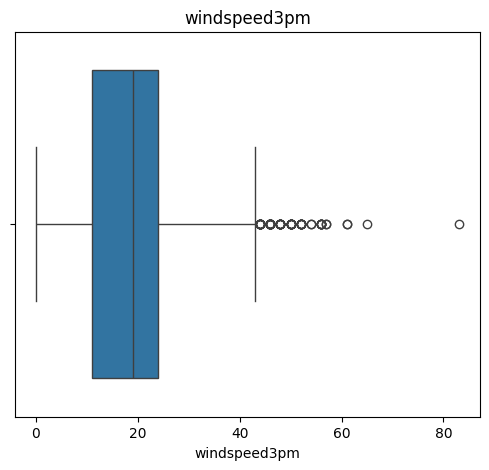

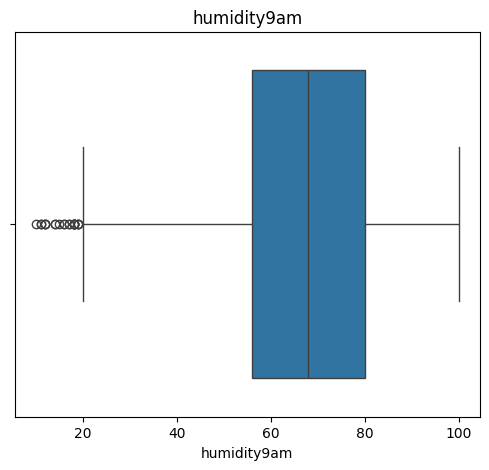

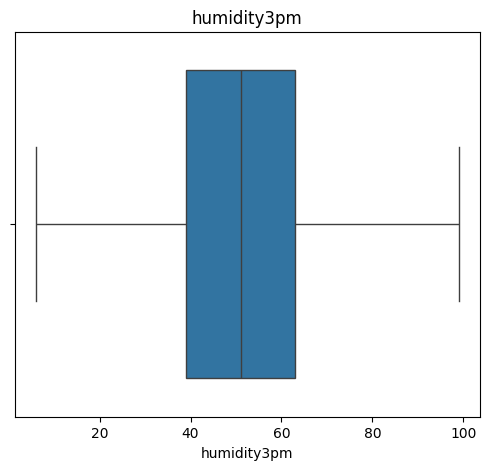

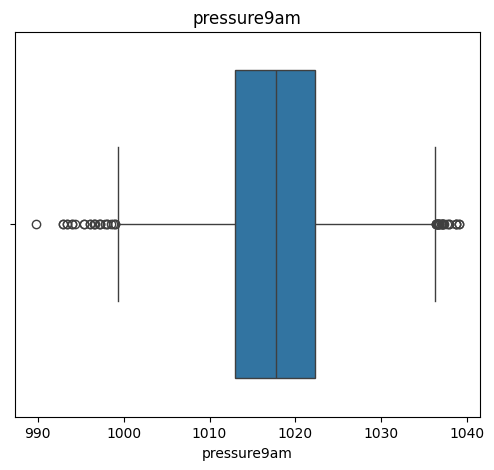

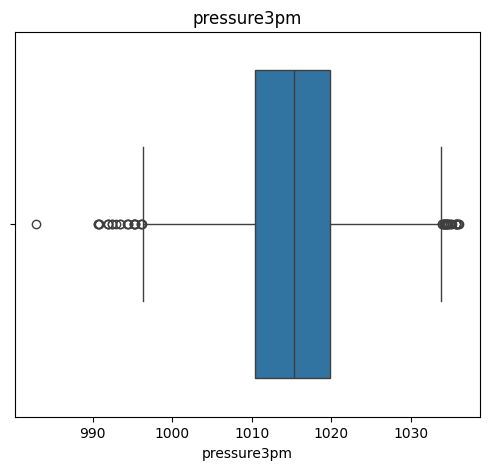

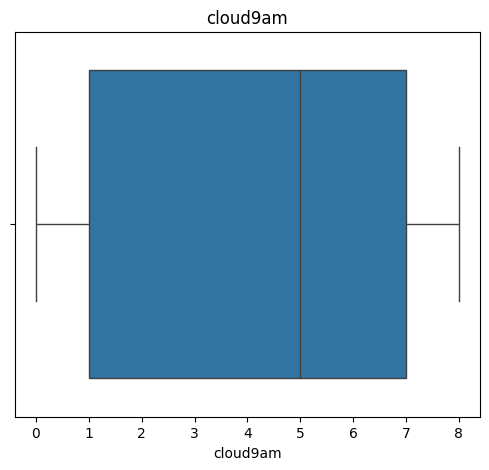

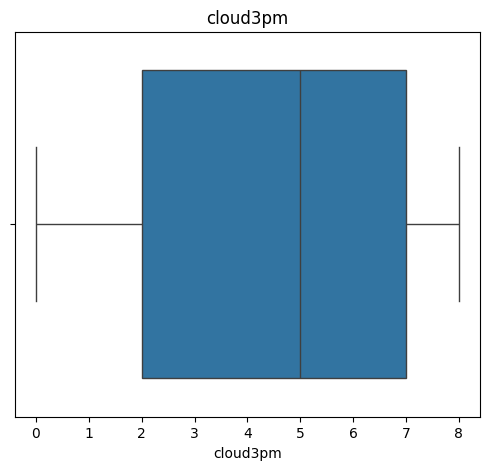

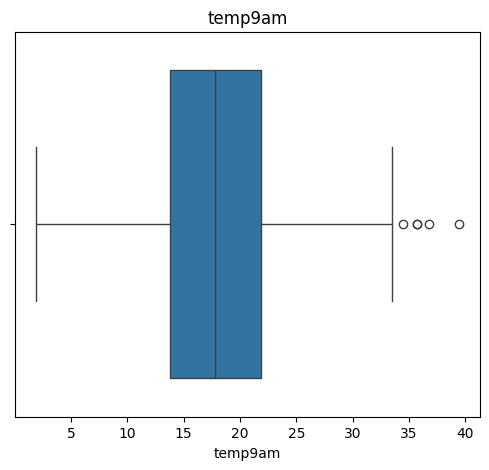

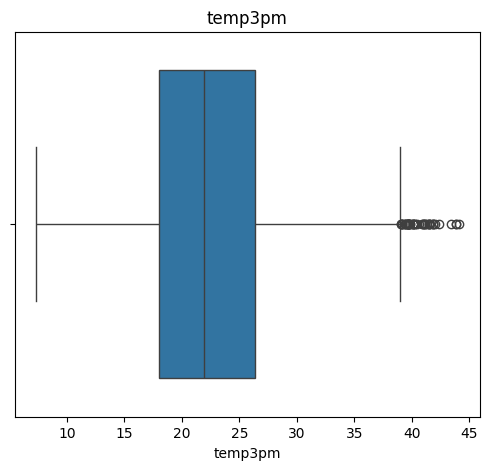

<Figure size 600x500 with 0 Axes>

In [13]:
for i in numerical_feature:
    sns.boxplot(ausw[i],orient="h")
    plt.title(i)
    plt.figure(figsize=(6,5));

plotting box plots to understand the spread and outliers that may affect the conclusion.
____________________

filling the nan values for respective columns

In [14]:
for i in numerical_feature:
    if i !=0:
        ausw[i] = ausw[i].fillna(ausw[i].mean())

In [15]:
ausw.isnull().sum()

location           0
mintemp            0
maxtemp            0
rainfall           0
evaporation        0
sunshine           0
windgustdir      991
windgustspeed      0
winddir9am       829
winddir3pm       308
windspeed9am       0
windspeed3pm       0
humidity9am        0
humidity3pm        0
pressure9am        0
pressure3pm        0
cloud9am           0
cloud3pm           0
temp9am            0
temp3pm            0
raintoday        240
raintomorrow     238
dtype: int64

In [16]:
categorical_feature

['location',
 'windgustdir',
 'winddir9am',
 'winddir3pm',
 'raintoday',
 'raintomorrow']

In [17]:
ausw['windgustdir'].value_counts()

N      713
SSE    578
S      577
SW     572
E      557
WNW    531
W      507
WSW    504
SE     484
ENE    415
SSW    396
NW     383
NE     353
NNE    343
ESE    302
NNW    219
Name: windgustdir, dtype: int64

In [18]:
ausw['winddir9am'].value_counts()

N      906
SW     704
NW     625
WSW    543
SE     505
WNW    480
SSW    467
ENE    433
NNE    430
W      414
NE     409
S      402
E      380
SSE    365
NNW    280
ESE    253
Name: winddir9am, dtype: int64

In [19]:
ausw['winddir3pm'].value_counts()

SE     813
S      742
SSE    623
WSW    580
NE     544
N      524
SW     494
WNW    487
NW     468
W      462
ESE    462
E      460
ENE    417
SSW    370
NNE    365
NNW    306
Name: winddir3pm, dtype: int64

In [20]:
ausw['raintoday'].value_counts()

No     6195
Yes    1990
Name: raintoday, dtype: int64

In [21]:
ausw['raintomorrow'].value_counts()

No     6195
Yes    1991
NA        1
Name: raintomorrow, dtype: int64

In [22]:
ausw['raintomorrow'] = ausw['raintomorrow'].replace("NA","Yes")

In [23]:
ausw.isnull().sum()

location           0
mintemp            0
maxtemp            0
rainfall           0
evaporation        0
sunshine           0
windgustdir      991
windgustspeed      0
winddir9am       829
winddir3pm       308
windspeed9am       0
windspeed3pm       0
humidity9am        0
humidity3pm        0
pressure9am        0
pressure3pm        0
cloud9am           0
cloud3pm           0
temp9am            0
temp3pm            0
raintoday        240
raintomorrow     238
dtype: int64

using mode to fill the cat columns

In [24]:
ausw['windgustdir'].fillna(ausw['windgustdir'].mode()[0], inplace=True)
ausw['winddir9am'].fillna(ausw['winddir9am'].mode()[0], inplace=True)
ausw['winddir3pm'].fillna(ausw['winddir3pm'].mode()[0], inplace=True)
ausw['raintoday'].fillna(ausw['raintoday'].mode()[0], inplace=True)
ausw['raintomorrow'].fillna(ausw['raintomorrow'].mode()[0], inplace=True)

In [25]:
ausw.isnull().sum()

location         0
mintemp          0
maxtemp          0
rainfall         0
evaporation      0
sunshine         0
windgustdir      0
windgustspeed    0
winddir9am       0
winddir3pm       0
windspeed9am     0
windspeed3pm     0
humidity9am      0
humidity3pm      0
pressure9am      0
pressure3pm      0
cloud9am         0
cloud3pm         0
temp9am          0
temp3pm          0
raintoday        0
raintomorrow     0
dtype: int64

after filling the missing values will work on removing the outliers and skewness for normalization

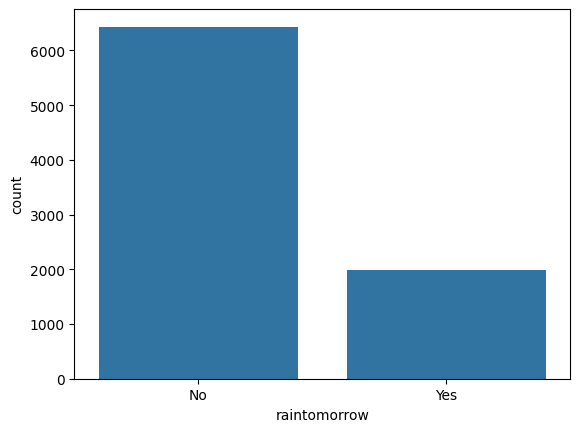

In [26]:
sns.countplot(x= ausw["raintomorrow"]);

In [27]:
from scipy.stats import zscore

In [28]:
#creating a function to choose right threshold
def threhold(z,d):
    for i in np.arange(3,5,0.3):
        data=d.copy()
        data=data[(z<i).all(axis=1)]
        loss=(d.shape[0]-data.shape[0])/d.shape[0]*100
        print('With threshold {} data loss is {}%'.format(np.round(i,1),np.round(loss,2)))

In [29]:
z=np.abs(zscore(ausw[numerical_feature]))
threhold(z,ausw[numerical_feature])

With threshold 3.0 data loss is 5.2%
With threshold 3.3 data loss is 3.54%
With threshold 3.6 data loss is 2.77%
With threshold 3.9 data loss is 1.99%
With threshold 4.2 data loss is 1.59%
With threshold 4.5 data loss is 1.29%
With threshold 4.8 data loss is 1.08%


In [30]:
aus=ausw[(z<4.8).all(axis=1)]

In [31]:
print ("Shape of the dataframe before removing outliers: ",ausw.shape)
print ("Shape of the dataframe after removing outliers: ", aus.shape)
print ("Percentage of data loss post outlier removal: ", (ausw.shape[0]-aus.shape[0])/ausw.shape[0]*100)

Shape of the dataframe before removing outliers:  (8425, 22)
Shape of the dataframe after removing outliers:  (8334, 22)
Percentage of data loss post outlier removal:  1.0801186943620178


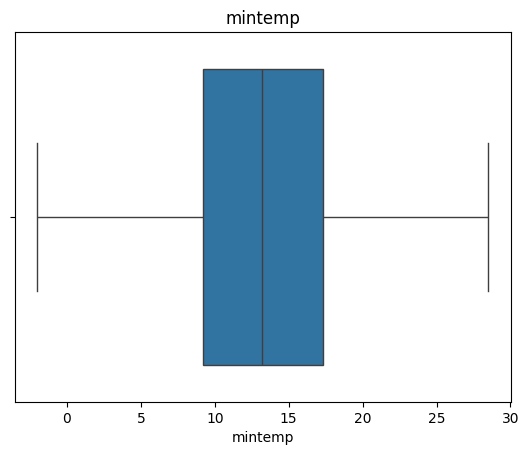

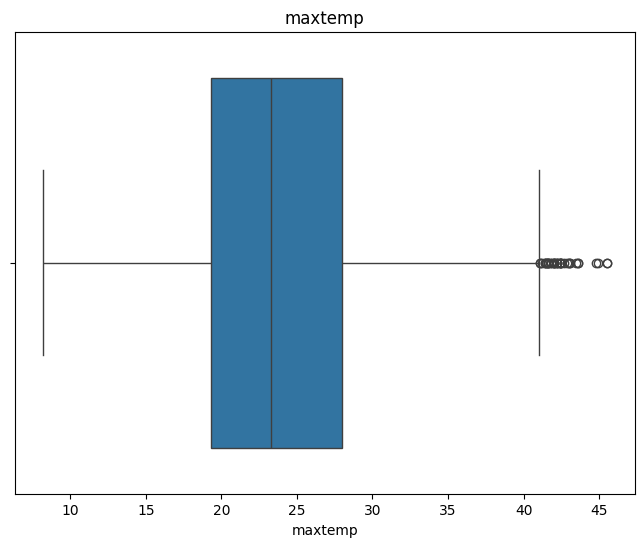

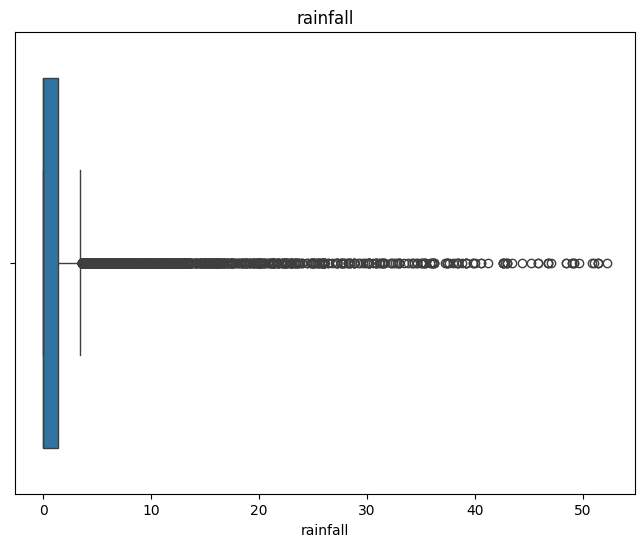

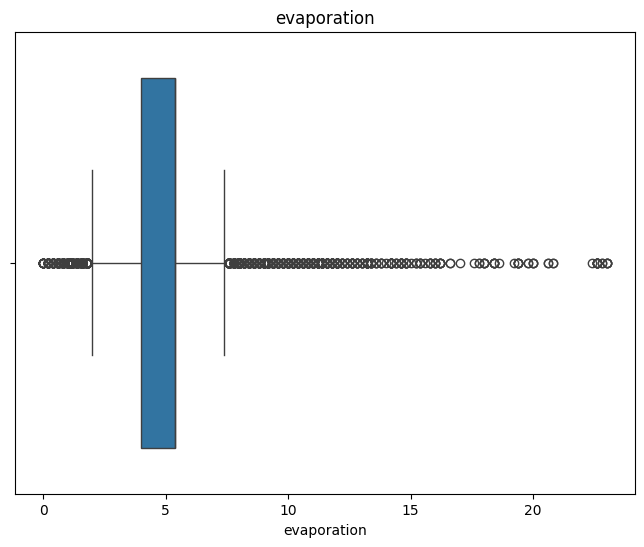

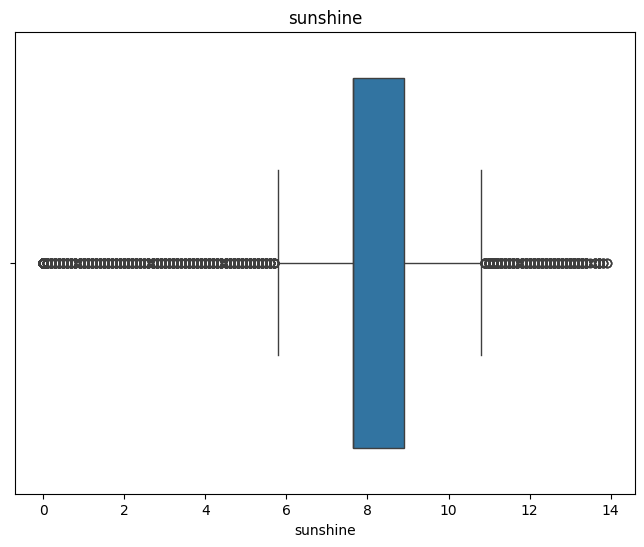

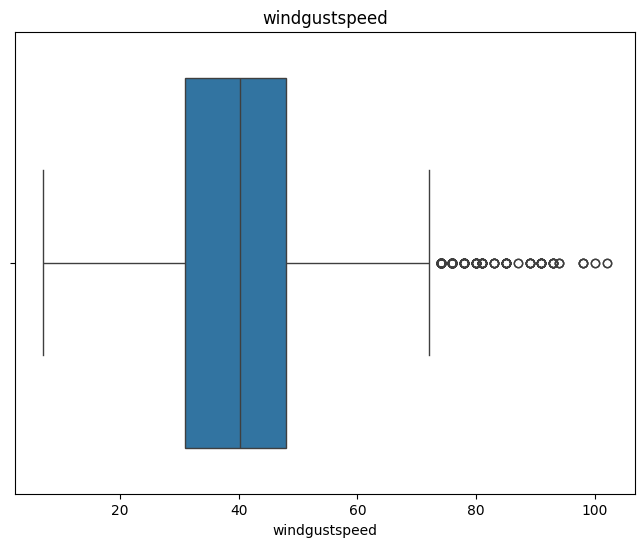

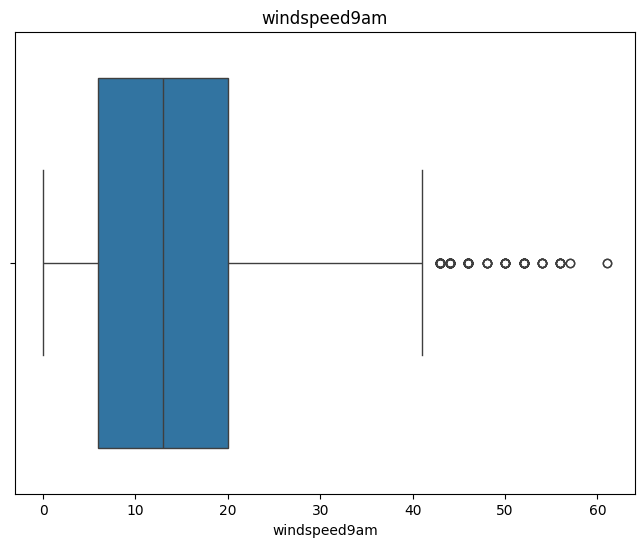

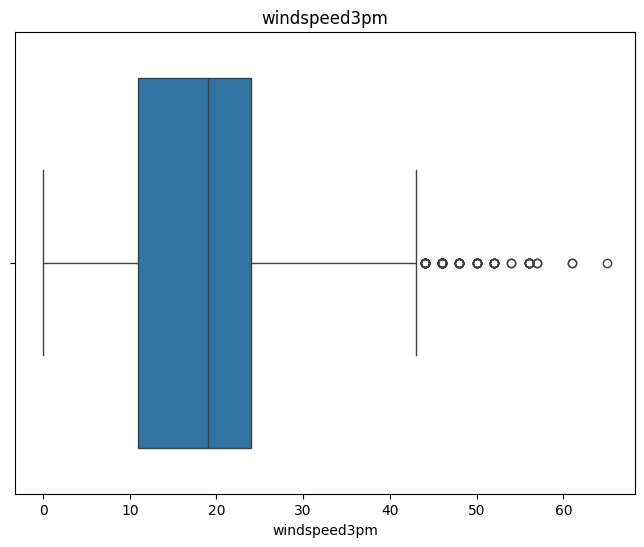

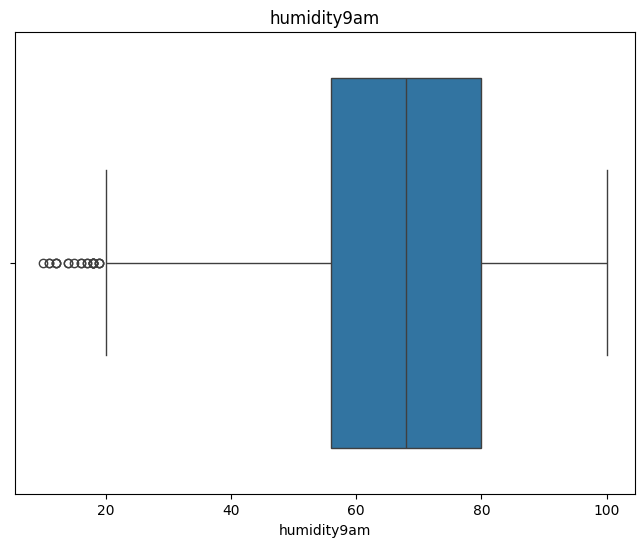

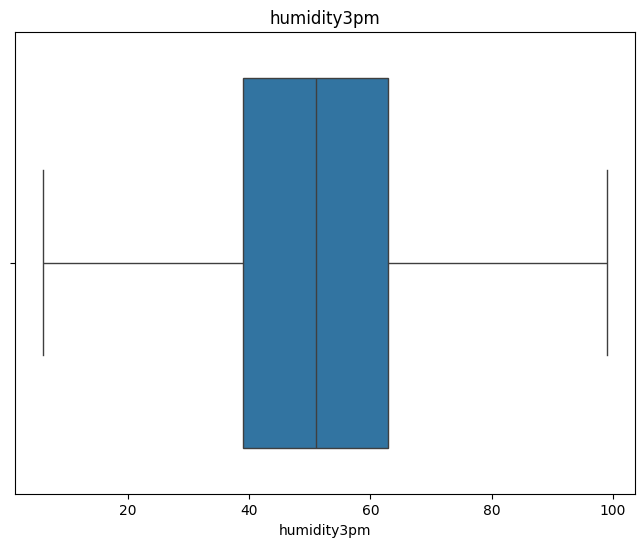

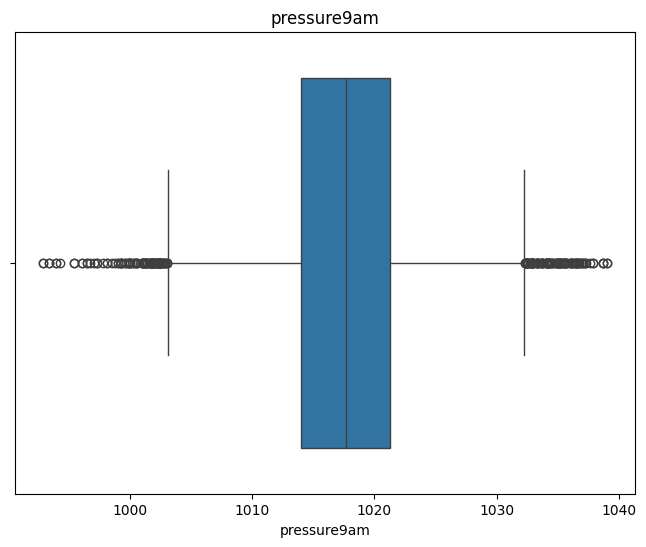

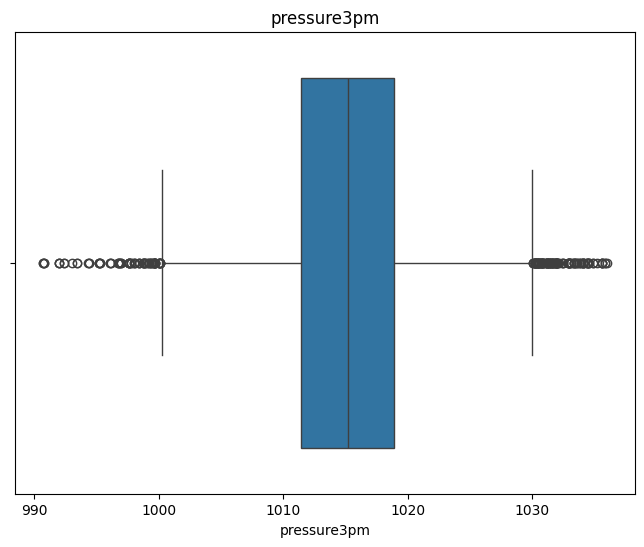

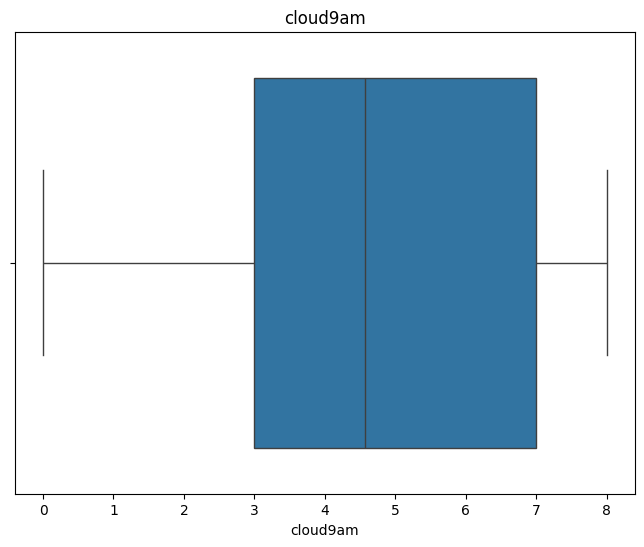

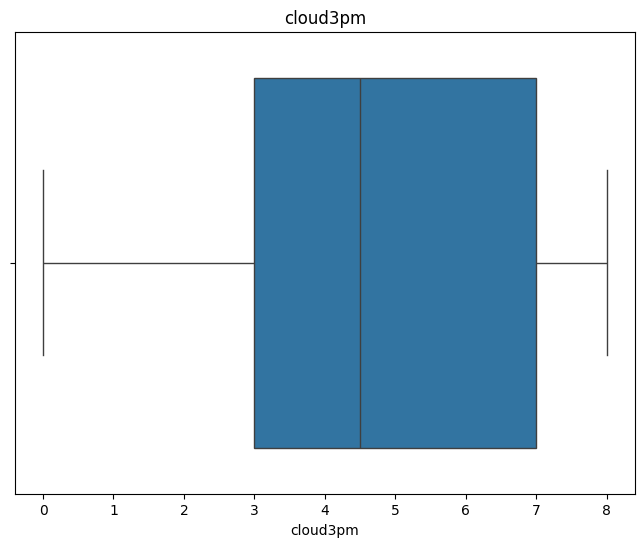

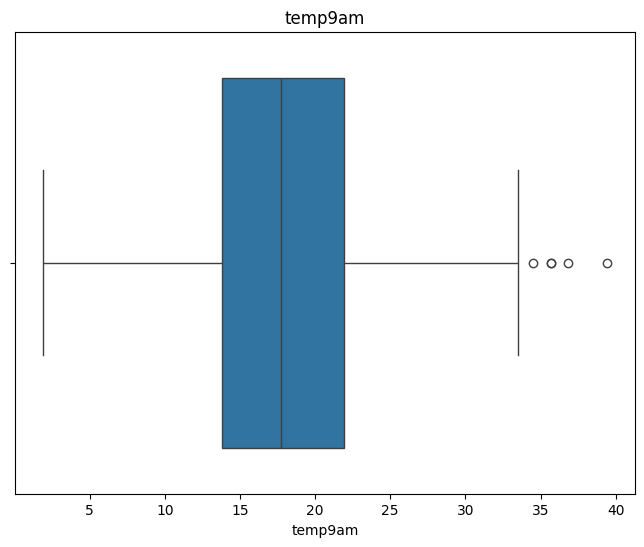

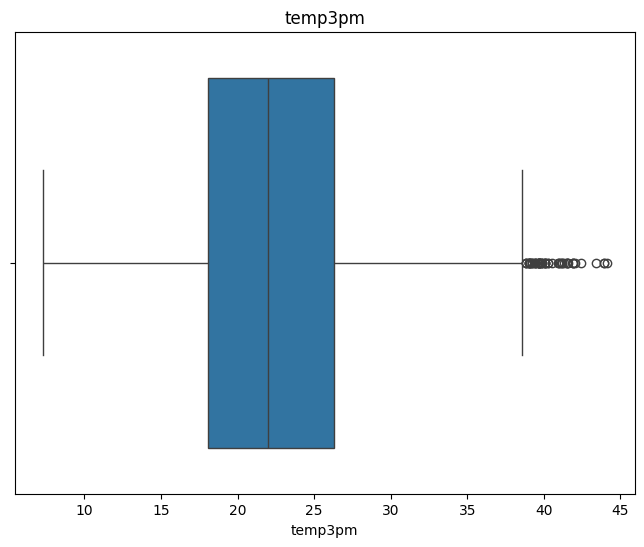

<Figure size 800x600 with 0 Axes>

In [32]:
for i in numerical_feature:
    sns.boxplot(aus[i],orient="h")
    plt.title(i)
    plt.figure(figsize=(8,6));

In [33]:
aus[numerical_feature].skew()

mintemp         -0.081630
maxtemp          0.379632
rainfall         4.156461
evaporation      1.677807
sunshine        -0.712447
windgustspeed    0.744000
windspeed9am     0.946987
windspeed3pm     0.463304
humidity9am     -0.259261
humidity3pm      0.111709
pressure9am     -0.011512
pressure3pm      0.009665
cloud9am        -0.362682
cloud3pm        -0.277033
temp9am         -0.008149
temp3pm          0.397501
dtype: float64

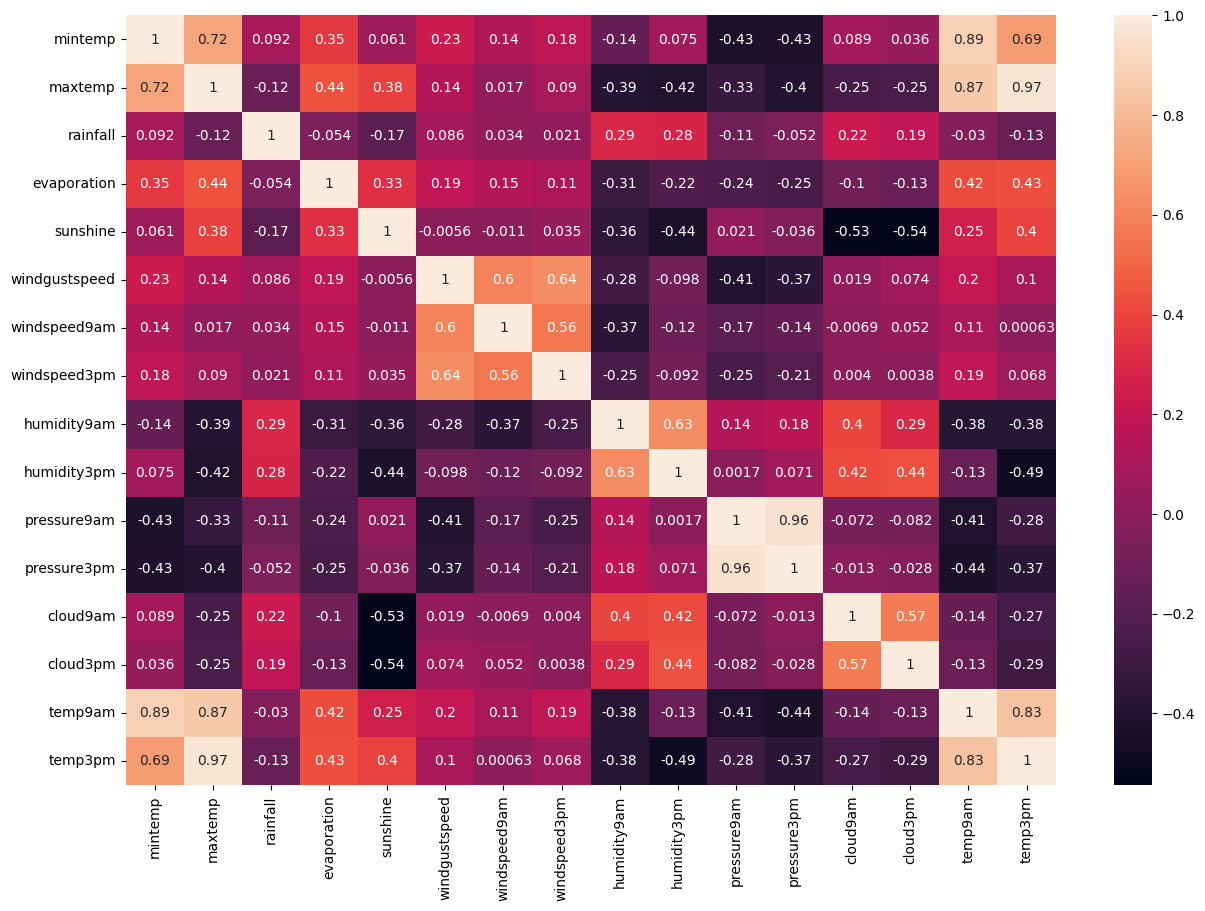

In [34]:
plt.figure(figsize=(15,10))
sns.heatmap(aus[numerical_feature].corr(),annot=True)
plt.show();

# Scaling & training the model

In [35]:
aus.to_csv("preprocessed.csv", index=False)

In [36]:
import sklearn
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier,StackingClassifier,GradientBoostingClassifier,AdaBoostClassifier
import xgboost as xgb
from sklearn import metrics
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV,GridSearchCV
from sklearn.metrics import classification_report,accuracy_score,roc_curve,confusion_matrix,accuracy_score, roc_auc_score, recall_score, precision_score, f1_score,confusion_matrix, ConfusionMatrixDisplay
import datetime
from time import time
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler,LabelEncoder
from collections import Counter

In [37]:
aus

,location,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,windgustspeed,winddir9am,winddir3pm,...,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,raintomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,Albury,13.4,22.900000,0.6,5.389395,7.632205,W,44.000000,W,WNW,...,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,No,No
2008-12-02,Albury,7.4,25.100000,0.0,5.389395,7.632205,WNW,44.000000,NNW,WSW,...,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,No,No
2008-12-03,Albury,12.9,25.700000,0.0,5.389395,7.632205,WSW,46.000000,W,WSW,...,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,No,No
2008-12-04,Albury,9.2,28.000000,0.0,5.389395,7.632205,NE,24.000000,SE,E,...,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,No,No
2008-12-05,Albury,17.5,32.300000,1.0,5.389395,7.632205,W,41.000000,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-21,Uluru,2.8,23.400000,0.0,5.389395,7.632205,E,31.000000,SE,ENE,...,51.0,24.0,1024.6,1020.3,4.566622,4.503183,10.1,22.4,No,No
2017-06-22,Uluru,3.6,25.300000,0.0,5.389395,7.632205,NNW,22.000000,SE,N,...,56.0,21.0,1023.5,1019.1,4.566622,4.503183,10.9,24.5,No,No
2017-06-23,Uluru,5.4,26.900000,0.0,5.389395,7.632205,N,37.000000,SE,WNW,...,53.0,24.0,1021.0,1016.8,4.566622,4.503183,12.5,26.1,No,No


In [38]:
le = LabelEncoder()

In [39]:
for i in categorical_feature:
  aus[i] = le.fit_transform(aus[i])

<ipython-input-39-922529915ee0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aus[i] = le.fit_transform(aus[i])
<ipython-input-39-922529915ee0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aus[i] = le.fit_transform(aus[i])
<ipython-input-39-922529915ee0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

In [40]:
aus

,location,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,windgustspeed,winddir9am,winddir3pm,...,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,raintomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,1,13.4,22.900000,0.6,5.389395,7.632205,13,44.000000,13,14,...,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,0,0
2008-12-02,1,7.4,25.100000,0.0,5.389395,7.632205,14,44.000000,6,15,...,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,0,0
2008-12-03,1,12.9,25.700000,0.0,5.389395,7.632205,15,46.000000,13,15,...,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,0,0
2008-12-04,1,9.2,28.000000,0.0,5.389395,7.632205,4,24.000000,9,0,...,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,0,0
2008-12-05,1,17.5,32.300000,1.0,5.389395,7.632205,13,41.000000,1,7,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-21,9,2.8,23.400000,0.0,5.389395,7.632205,0,31.000000,9,1,...,51.0,24.0,1024.6,1020.3,4.566622,4.503183,10.1,22.4,0,0
2017-06-22,9,3.6,25.300000,0.0,5.389395,7.632205,6,22.000000,9,3,...,56.0,21.0,1023.5,1019.1,4.566622,4.503183,10.9,24.5,0,0
2017-06-23,9,5.4,26.900000,0.0,5.389395,7.632205,3,37.000000,9,14,...,53.0,24.0,1021.0,1016.8,4.566622,4.503183,12.5,26.1,0,0


In [41]:
aus.dtypes

location           int64
mintemp          float64
maxtemp          float64
rainfall         float64
evaporation      float64
sunshine         float64
windgustdir        int64
windgustspeed    float64
winddir9am         int64
winddir3pm         int64
windspeed9am     float64
windspeed3pm     float64
humidity9am      float64
humidity3pm      float64
pressure9am      float64
pressure3pm      float64
cloud9am         float64
cloud3pm         float64
temp9am          float64
temp3pm          float64
raintoday          int64
raintomorrow       int64
dtype: object

In [42]:
X=aus.iloc[ : , :-1]
y=aus.iloc[ :,-1]

In [43]:
sc= StandardScaler()
x=sc.fit_transform(X)

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.2,random_state = 0)

In [45]:
sm=SMOTE(random_state=0)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_res)))

The number of classes before fit Counter({0: 5098, 1: 1569})
The number of classes after fit Counter({0: 5098, 1: 5098})


In [46]:
models={'LogisticRegression':LogisticRegression(),'DecisionTreeClassifier':DecisionTreeClassifier(),'RandomForestClassifer':RandomForestClassifier(),
        'AdaBoostClassifier':AdaBoostClassifier(),'GradientBoostingClassifier':GradientBoostingClassifier(),'XGBClassifier':xgb.XGBClassifier(),
       'QuadraticDiscriminantAnalysis':QuadraticDiscriminantAnalysis(),'KNeighborsClassifier':KNeighborsClassifier()}

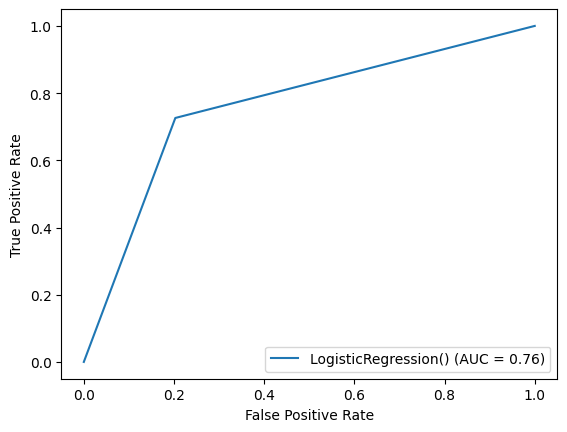

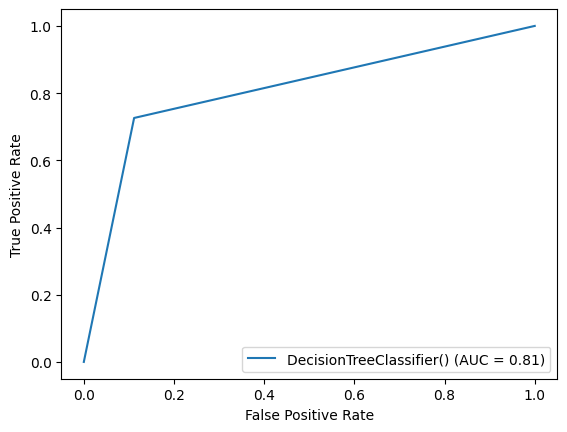

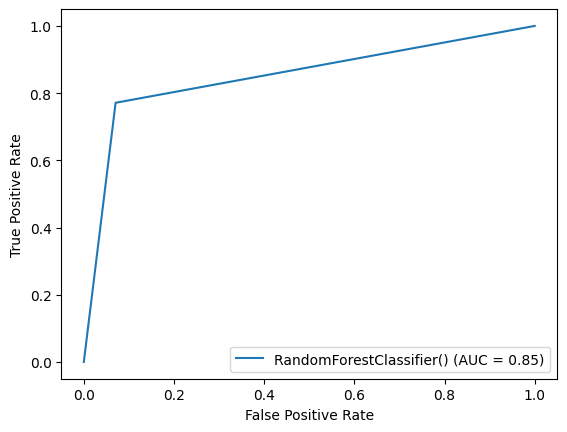

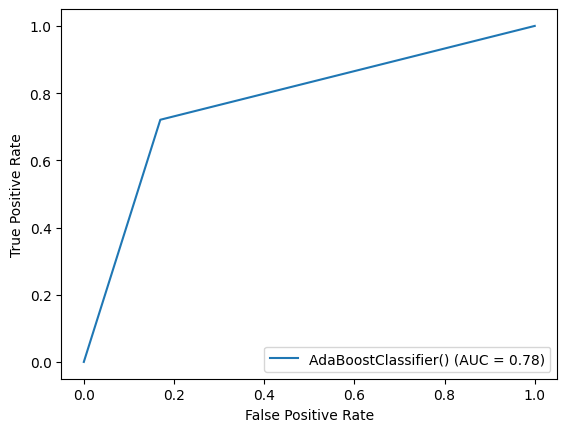

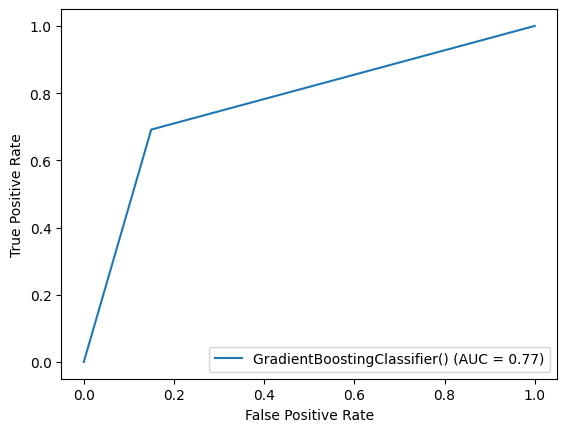

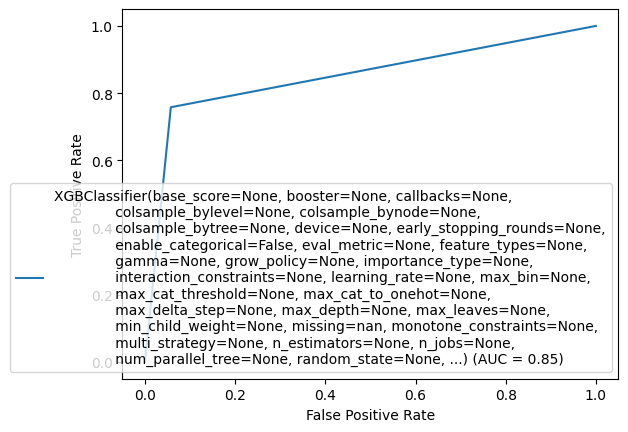

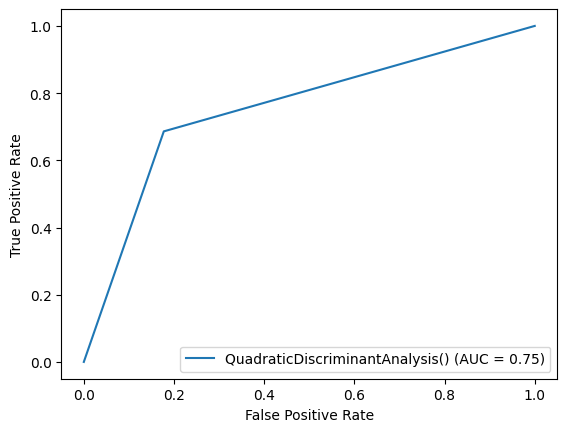

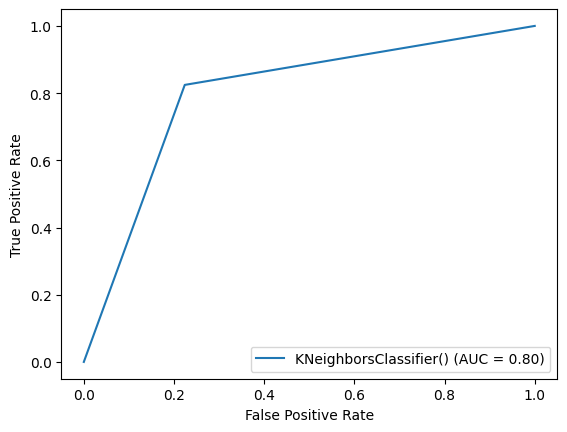

In [47]:
name=[]
accuracy=[]
AUC=[]
Recall =[]
Precision =[]
F1 =[]
head = 12
for model in models.values():
    start = time()
    model.fit(x_train_res, y_train_res)
    y_pred = model.predict(x_test)
    train_time = time() - start
    start = time()
    predict_time = time()-start
    #print(model)
    name.append(models.keys())
    #print("\tAccuracy Score:", accuracy_score(y_test, y_pred))
    accuracy.append(accuracy_score(y_test, y_pred))
    #print("\tConfusion Matrix:", confusion_matrix(y_test, y_pred))
    AUC.append(metrics.roc_auc_score(y_test, y_pred))
    Recall.append(metrics.recall_score(y_test, y_pred))
    Precision.append(metrics.precision_score(y_test, y_pred))
    F1.append(metrics.f1_score(y_test, y_pred))
    score = cross_val_score(model,x_train, y_train)
    #print(score)
    #print(score.mean())
    #print("Difference btw accurancy and CV score is  ",accuracy_score(y_test, y_pred) - score.mean())
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=model)
    display.plot();
    #print("\tClassification Report:", classification_report(y_test, y_pred))
    print();

In [48]:
data=pd.DataFrame()
data['Model']=models.keys()
data['accuracyscore']=accuracy
data['AUC']=AUC
data['Recall'] =Recall
data['Precision'] =Precision
data['F1']=F1

In [49]:
data

,Model,accuracyscore,AUC,Recall,Precision,F1
0,LogisticRegression,0.781044,0.761560,0.726064,0.510280,0.599341
1,DecisionTreeClassifier,0.851830,0.807261,0.726064,0.654676,0.688525
2,RandomForestClassifer,0.893821,0.850394,0.771277,0.761155,0.766182
3,AdaBoostClassifier,0.805639,0.775554,0.720745,0.553061,0.625866
4,GradientBoostingClassifier,0.814637,0.770996,0.691489,0.573951,0.627262
5,XGBClassifier,0.901020,0.850329,0.757979,0.793872,0.775510
6,QuadraticDiscriminantAnalysis,0.791842,0.754394,0.686170,0.529774,0.597914
7,KNeighborsClassifier,0.787043,0.800305,0.824468,0.517529,0.635897


**we see that XGBClassifier , RandomForestClassifer  are giving very good results so will work on tunning these 2 models**

<ipython-input-50-c5f3ae17524d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data, x='accuracyscore', y='Model', inner='stick', palette='Dark2')


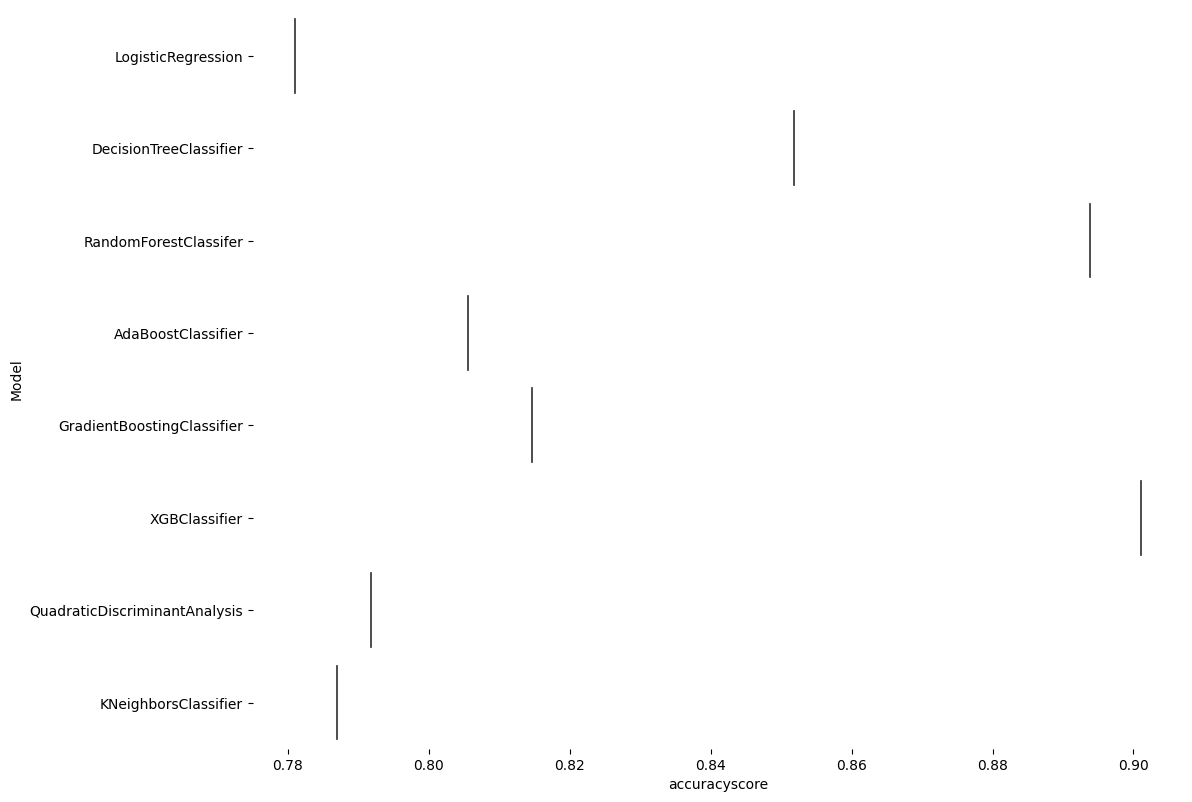

In [50]:
# @title Model vs accuracyscore

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='accuracyscore', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

# Hyperparameter Tunning


**RandomForestClassifier**

In [73]:
params={'n_estimators':[100,200, 300, 500],
        'criterion':['gini', 'entropy', 'log_loss'],
        'max_features':["sqrt"],
        'min_samples_split':[0.002,2,3,0.1],
        'min_samples_leaf':[1,2,3,4],
        'max_depth':[1,2,3,4,5,6,7,8,9,10,15]}

In [74]:
a=RandomizedSearchCV(RandomForestClassifier(),params,cv=5,n_jobs=-2,error_score='raise')
a.fit(x_train_res,y_train_res)

RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=RandomForestClassifier(), n_jobs=-2,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 15],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [0.002, 2, 3, 0.1],
                                        'n_estimators': [100, 200, 300, 500]})

In [75]:
print(a.best_estimator_)
print(a.best_params_)
print(a.best_score_)

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=3,
                       n_estimators=500)
{'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 15, 'criterion': 'entropy'}
0.9098702266585889


In [76]:
rfc=RandomForestClassifier(n_estimators= 500, min_samples_split= 2, min_samples_leaf= 3,max_features= 'sqrt',max_depth= 15,criterion= 'entropy')
rfc.fit(x_train_res,y_train_res)
p1=rfc.predict(x_test)

In [77]:
score=cross_val_score(rfc,x,y,cv=10,n_jobs=-2)

In [78]:
print(accuracy_score(y_test, p1))
print(confusion_matrix(y_test, p1))

0.8788242351529694
[[1173  118]
 [  84  292]]


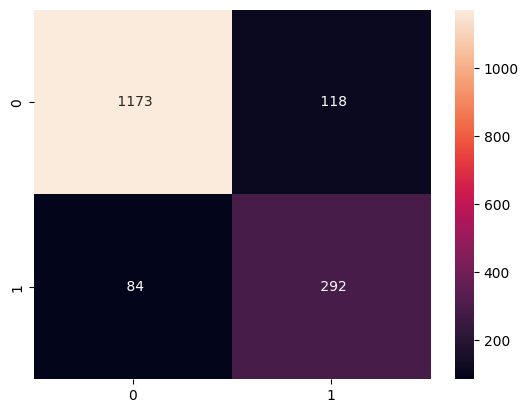

In [79]:
sns.heatmap(confusion_matrix(y_test, p1),annot=True,fmt=' ');

**XGBClassifier**

In [84]:
params={'colsample_bytree':[0.6,0.2,0.8], 'gamma':[4.1,2.5,6.8],
        'max_depth':[2,14,30,45], 'min_child_weight':[0.1,0.001,1.0,1.8],
        'reg_alpha': [57.0,20,15,65,95], 'reg_lambda': [0.8,1.6,2.4,3.2,4.5]}

In [85]:
b=RandomizedSearchCV(xgb.XGBClassifier(),params,cv=10,n_jobs=-2,error_score='raise')
b.fit(x_train_res,y_train_res)

RandomizedSearchCV(cv=10, error_score='raise',
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_jobs=-2,
                   param_distributions={'colsample_bytree': [0.6, 0.2, 0.8],
                                        'gamma': [4.1, 2.5, 6.8],
                                        'max_depth': [2, 14, 30, 45],
                                        'min_child_weight': [0.1, 0.001, 1.0,
                                                             1.8],
                                        'reg_alpha': [57.0, 20, 15, 65, 95],
                                        'reg_lambda': [0.8, 1.6, 2.4, 3.2,
                                                       4.5]})

In [86]:
print(b.best_estimator_)
print(b.best_params_)
print(b.best_score_)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=2.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=30, max_leaves=None,
              min_child_weight=1.8, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
{'reg_lambda': 4.5, 'reg_alpha': 15, 'min_child_weight': 1.8, 'max_depth': 30, 'gamma': 2.5, 'colsample_bytree': 0.8}
0.8553443398949373


In [87]:
xg=xgb.XGBRFClassifier(reg_lambda= 4.5, reg_alpha= 15, min_child_weight= 1.8, max_depth= 30, gamma= 2.5, colsample_bytree= 0.8)
xg.fit(x_train_res,y_train_res)
p2=xg.predict(x_test)

In [88]:
score=cross_val_score(xg,x,y,cv=10)

In [89]:
print(accuracy_score(y_test, p2))
print(confusion_matrix(y_test, p2))

0.7834433113377325
[[1033  258]
 [ 103  273]]


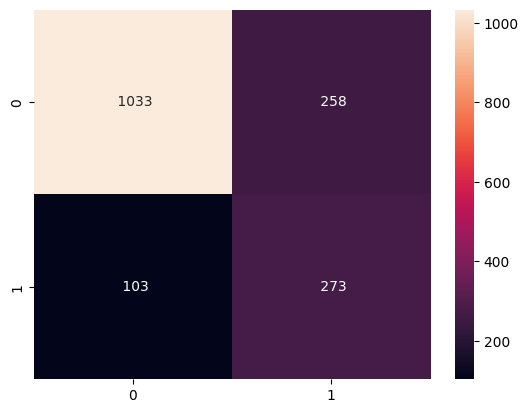

In [91]:
sns.heatmap(confusion_matrix(y_test, p2),annot=True,fmt=' ');

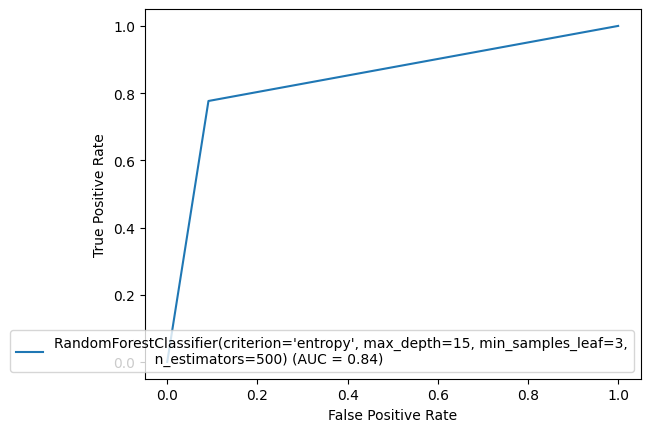

In [92]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, p1)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=rfc)
display.plot();

In [96]:
import joblib
joblib.dump(rfc,'rain_forecast.pkl')

['rain_forecast.pkl']